In [4]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
import pandas as pd
import seaborn as sns
importlib.reload(j)

import matplotlib.ticker as ticker
import glob

import plotter as p
importlib.reload(p)

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

In [80]:
def attdt():
    atf = {}
    atten = np.arange(0, 50, 10)
    for at in atten:
        atf[str(at) + ' dB'] = []
    atf['50-110 dB'] = []
    return atf

def p4():
    # 4x4 plotter
    paxis = []
    haxis = []
    hist = []
    fy = 8
    fx = 12
    fig = plt.figure(figsize=(fx, fy))
    for di, dirr in enumerate(dirrs):
        print(dirr)
        ####################### file prep #######################
        atf = attdt()
        atten = np.arange(110, -1, -10)
        # starfolder = 'release/release128/*'
        for starfolder in files:
            subfiles = glob.glob(dirr + starfolder)
            for file in subfiles:
                f = file.split('\\')[-1]
                for atn in atten:
                    if str(atn) in f:
                        # print(atn, file)
                        if atn >= 50:
                            atf['50-110 dB'].append(file)
                        else:
                            atf[str(atn) + ' dB'].append(file)
                        break
                else:
                    print('else', file)
                    atf['50-110 dB'].append(file)

        ####################### database {} prep #######################

        atd = attdt()
        for k in atf:
            # print(k, atf[k])
            for f in atf[k]:
                c = j.csvToDict(f)
                dp = j.dataProcess(c)
                atd[k].append(dp)
            atd[k] = j.merge(atd[k])
            # print('atd[k]', len(atd[k]))

        ####################### scatter #######################
        # fig = plt.figure()
        ax = fig.add_subplot(2, 2, di + 1)
        y = []
        x = []
        ka = []

        for i, k in enumerate(atd):
            try:
                ka.append(k)
                xx = np.array(atd[k][kx])
                yy = np.array(atd[k][ky])
                r = xx == xx
                r *= xx < -100
                r *= xx > -2000
                r2 = yy == yy
                r *= yy > 0
                r *= r2
                yy /= 1000
                ax.scatter(xx[r], yy[r], linestyle='dotted', color=cc[i], label=k)
                x.append(xx[r])
                y.append(yy[r])
            except (KeyError, IndexError) as e:
                print(e)
        hist.append([x, y])
        # ax = plt.gca()
        paxis.append(ax)
        ax.set_yscale('log')
        ax.set_xlim(plimx)
        ax.set_ylim(plimy)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        ax.legend()#bbox_to_anchor=(0.97, 1.15))

    plt.show()

    fy = 8
    fx = 12
    fig = plt.figure(figsize=(fx, fy))

    ####################### histogram #######################
    for hi, h in enumerate(hist):
        y = h[1]
        # fig = plt.figure()
        ax = fig.add_subplot(2, 2, hi + 1)
        try:
            data = np.concatenate(np.ravel(y))
        except ValueError:
            data = np.ravel(y)
        finally:
            _, lbins = np.histogram(data, bins=10)
            if not limited:
                logbins = np.logspace(np.log10(lbins[0]), np.log10(lbins[-1]), len(lbins))
            else:
                logbins = np.logspace(np.log10(hlimy[0]), np.log10(hlimy[1]), len(lbins))
            # ax = plt.gca()
            haxis.append(ax)
            n, rbins, _ = ax.hist(y, bins=logbins, log=True, range=hlimy, stacked=True)
            plt.xscale('log')

        ax.set_xlim(hlimx)
        # ax.set_ylim(hlimy)

        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))


    if not limited:
        # pxmin = pymin = pxmax = pymax = 1
        # hxmin = hymin = hxmax = hymax = 1
        plim = [1000, -1000]*2
        hlim = [1000, -1000]*2
        for pax, hax in zip(paxis, haxis):
            for i, p in enumerate(pax.axis()):
                plim[i] = min(plim[i], p) if i in [0, 2] else max(plim[i], p)
            for i, h in enumerate(hax.axis()):
                hlim[i] = min(hlim[i], h) if i in [0, 2] else max(hlim[i], h)
        for pax, hax in zip(paxis, haxis):
            pax.set_xlim(plim[:2])
            pax.set_ylim(plim[2:])
            hax.set_xlim(hlim[:2])
            hax.set_ylim(hlim[2:])
            for axis in [pax.yaxis, hax.yaxis]:
                axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        np.set_printoptions(precision=0, suppress=True)        
        print('plimx=', np.array(plim[:2]))
        print('plimy=', np.array(plim[2:]))
        print('hlimx=', np.array(hlim[:2]))
        print('hlimy=', np.array(hlim[2:]))

    plt.show()
    # plt.xscale('log')

In [136]:
[[1.1 for b in a] for a in [[1,2], [3,4,5]]]

[[1.1, 1.1], [1.1, 1.1, 1.1]]

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
'Signal power'
logs/zte_mtn/rf_shield/quectel/
'Signal power'
logs/nokia_vodacom/centurycity/quectel/
len(data) [308, 57, 112, 89] [1.    5.404 2.75  3.461]


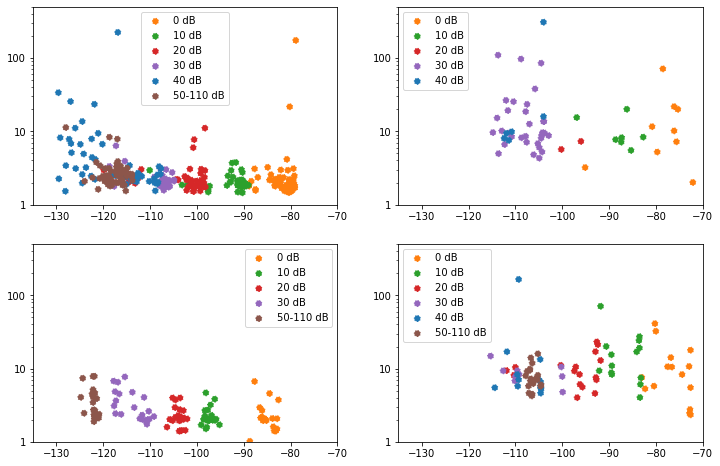

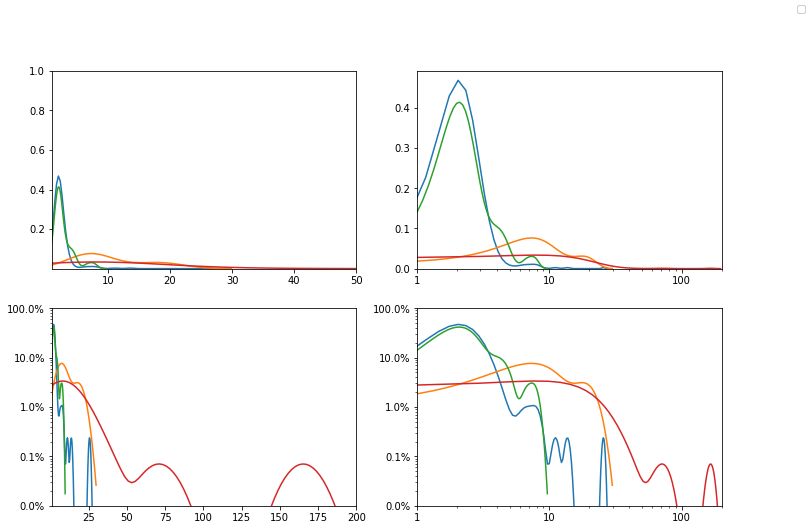

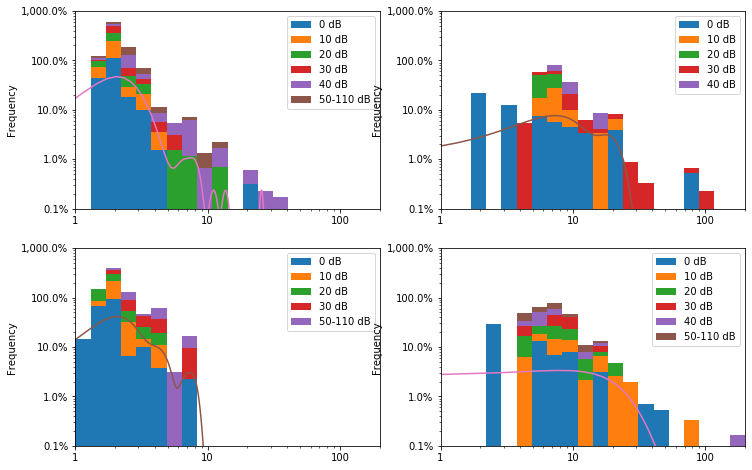

In [21]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

ky = 'txTime'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, -100, 0, None]
scale = [10, 1000]

if limited:
    plotlim = [-135,  -70, 1, 500]
    distlim = [1, 200, 0.0001, 1]
    histlim = [1, 200, 0.001, 10]
    
p.pan4('release_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited)

['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
'Signal power'
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
'Signal power'
'Signal power'


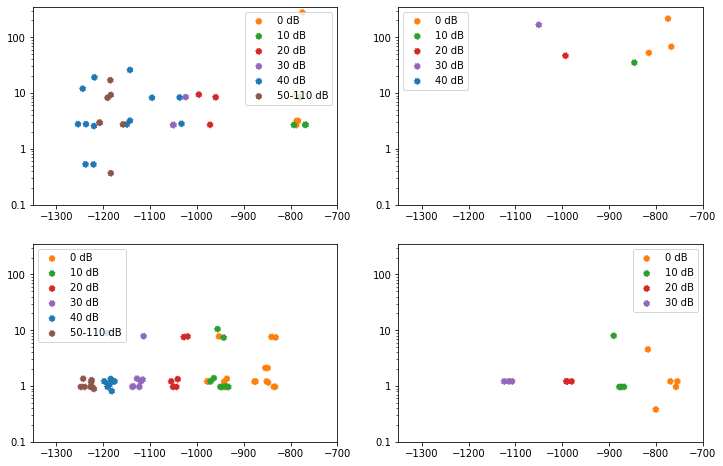

c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:107: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


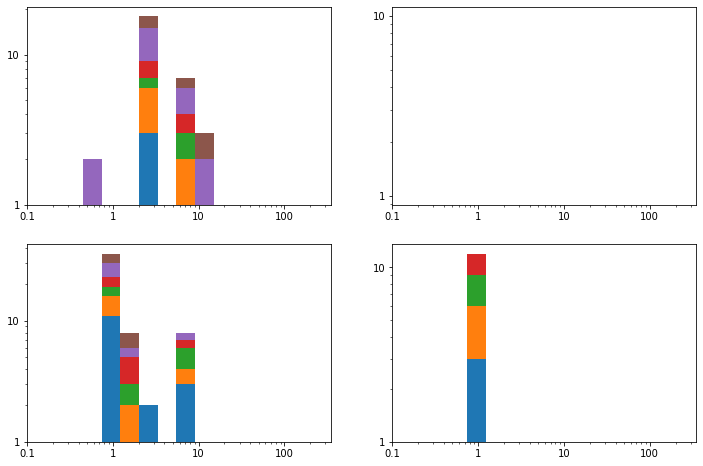

In [100]:
files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

ky = 'txTime'
kx = 'Signal power'

limited = True

plimx = [None, None]
plimy = [None, None]
hlimx = [None, None]
hlimy = [None, None]

if limited:
    plimx= [-1350, -700]
    plimy= [0.1, 350]
    hlimx= [0.1, 350]
    hlimy= [0.1, 15]

p4()

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/


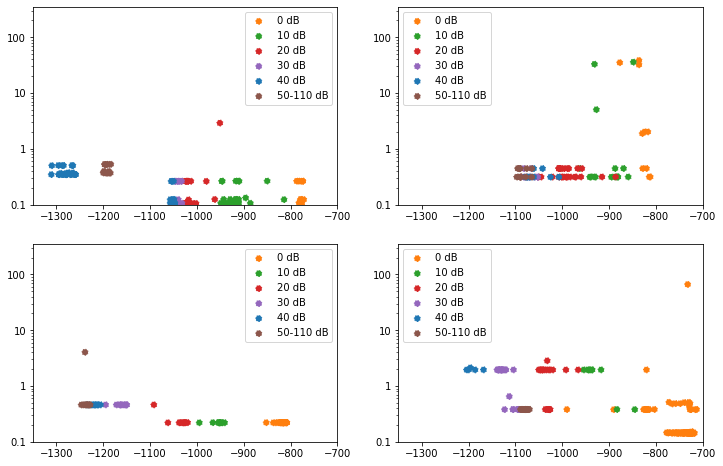

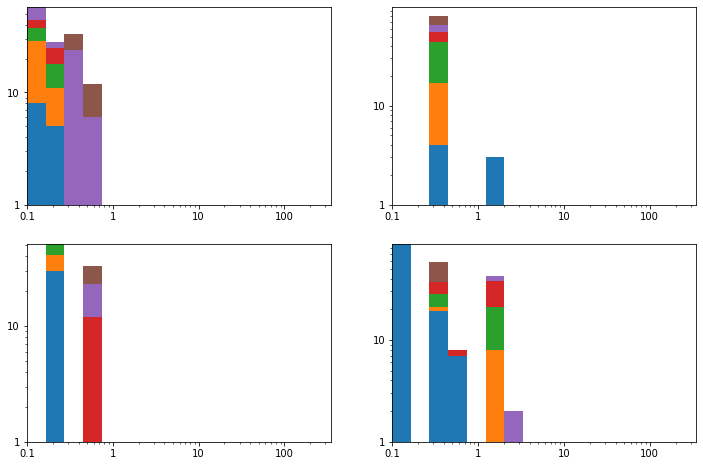

In [179]:
files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

ky = 'txTime'
kx = 'Signal power'

limited = True

plimx = [None, None]
plimy = [None, None]
hlimx = [None, None]
hlimy = [None, None]

if limited:
    plimx= [-1350, -700]
    plimy= [0.1, 350]
    hlimx= [0.1, 350]
    hlimy= [0.1, 15]

p4()

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
'Signal power'
logs/zte_mtn/rf_shield/quectel/
'Signal power'
logs/nokia_vodacom/centurycity/quectel/
len(data) [308, 57, 112, 89] [1.    5.404 2.75  3.461]


c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_core.py:1078: RuntimeWarning: invalid value encountered in greater_equal
  if (values >= 0).all():
c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_core.py:1080: RuntimeWarning: invalid value encountered in less_equal
  elif (values <= 0).all():


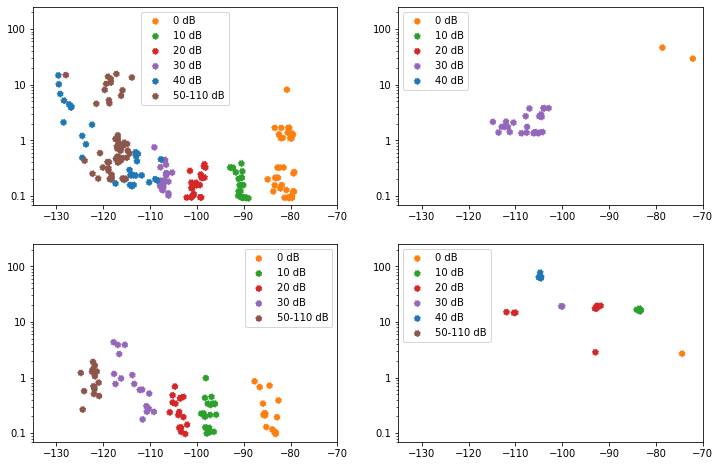

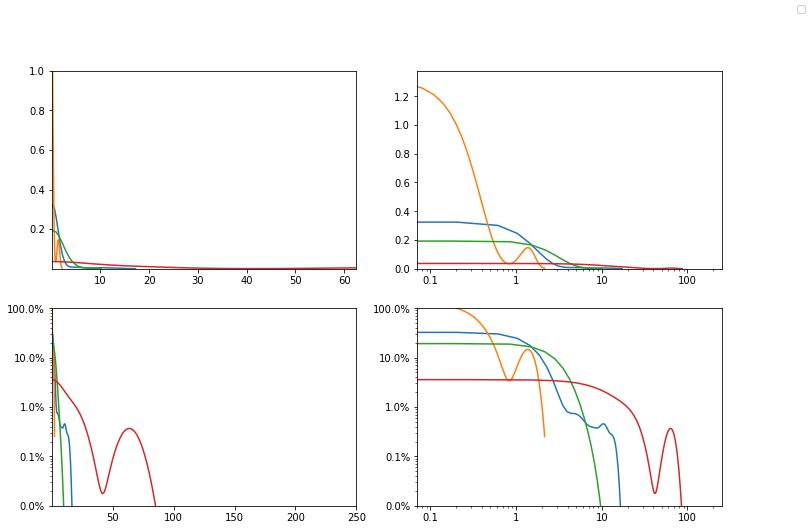

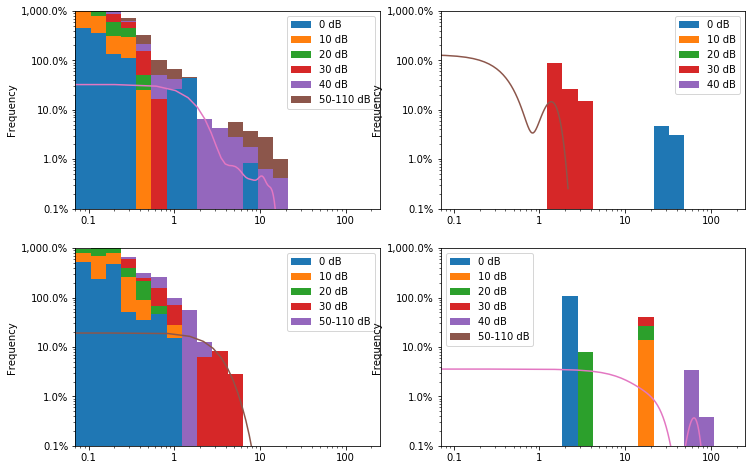

In [23]:
importlib.reload(p)

files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'txTimeNW'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.07
y = 250

percx = 0.0001
percy = 1

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('release_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
'Signal power'
logs/zte_mtn/rf_shield/quectel/
'Signal power'
logs/nokia_vodacom/centurycity/quectel/
len(data) [308, 57, 112, 89] [1.    5.404 2.75  3.461]


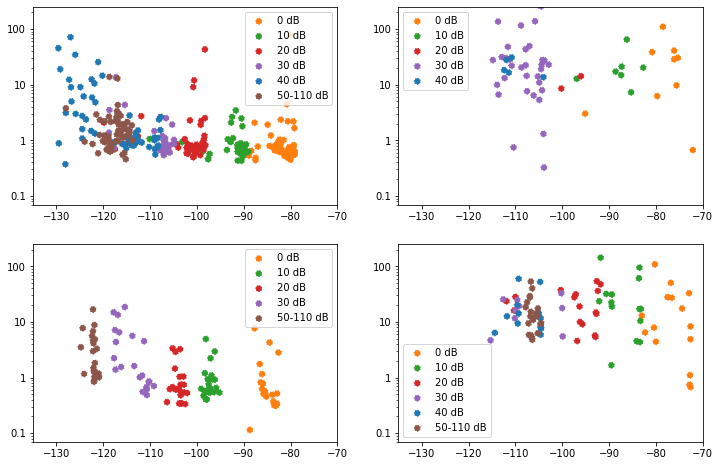

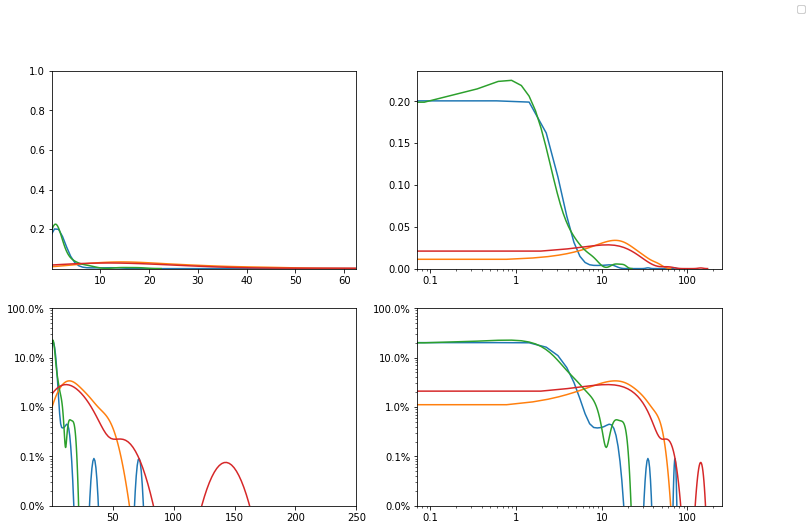

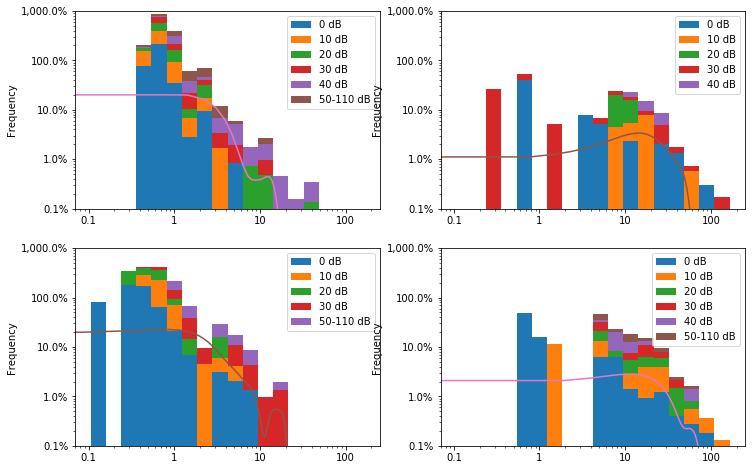

In [24]:
importlib.reload(p)

files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'energy'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.07
y = 250

percx = 0.0001
percy = 1

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]

p.pan4('release_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited)

In [125]:
sns.distplot?

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins, or None to use Freedman-Diaconis rule.
hist : bool, optional
    Whether to plot a (normed) histogram.
kde : bool, o

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
len(data) [132, 89, 85, 208] [1.576 2.337 2.447 1.   ]


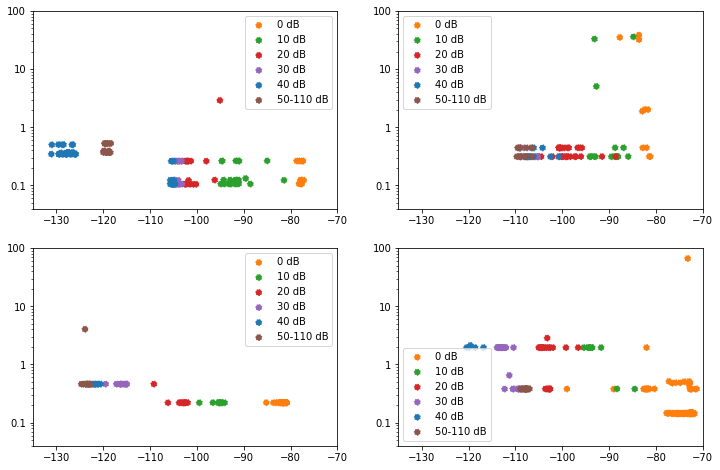

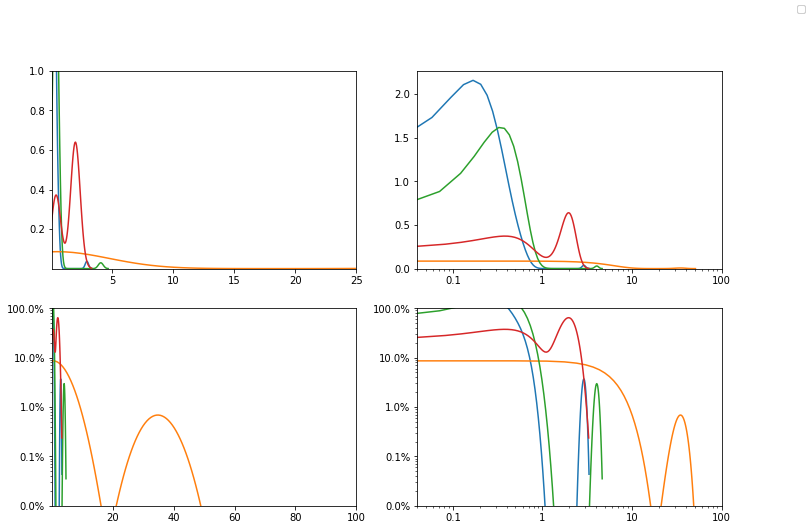

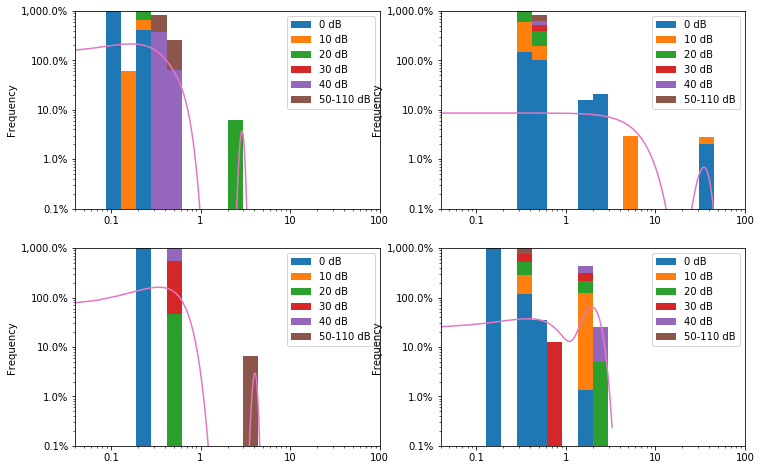

In [13]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'txTime'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.04
y = 100

percx = 0.0001
percy = 1

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('drx_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=20)

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
len(data) [132, 89, 85, 208] [1.576 2.337 2.447 1.   ]


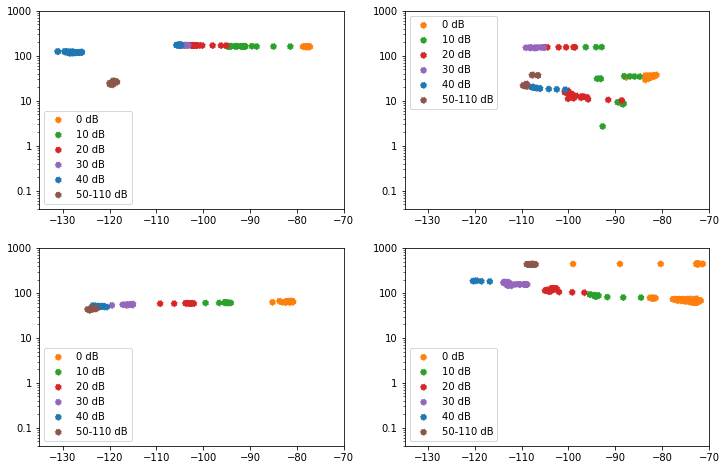

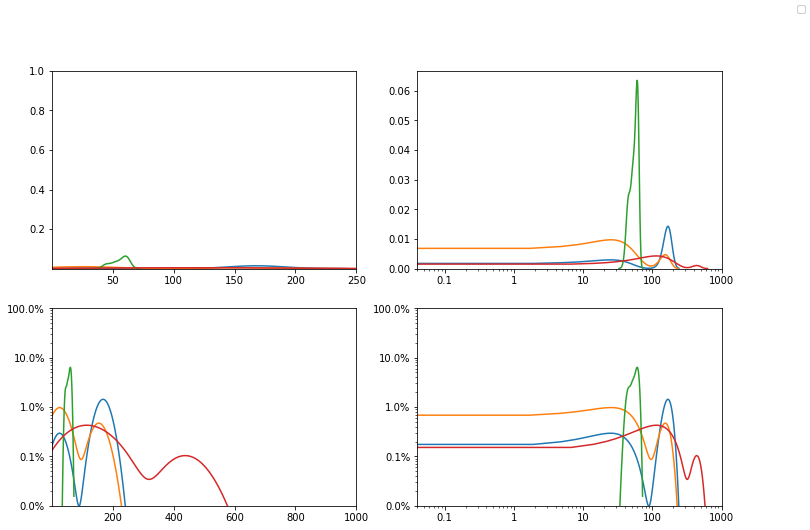

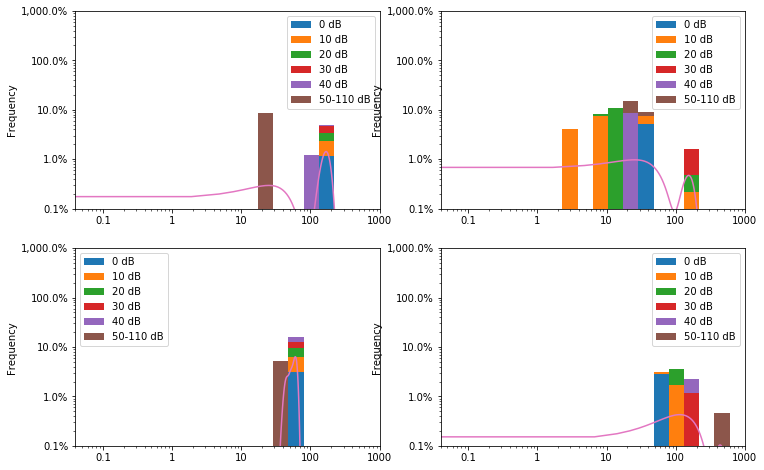

In [19]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'RX time'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.04
y = 1000

percx = 0.0001
percy = 1

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('drx_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=20)

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
len(data) [132, 89, 85, 208] [1.576 2.337 2.447 1.   ]


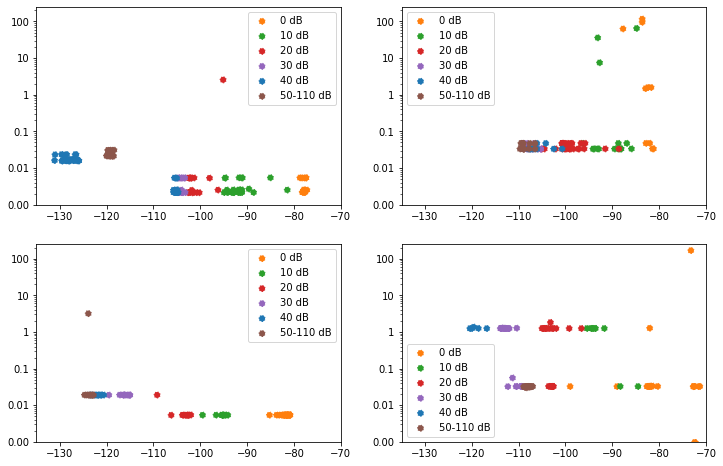

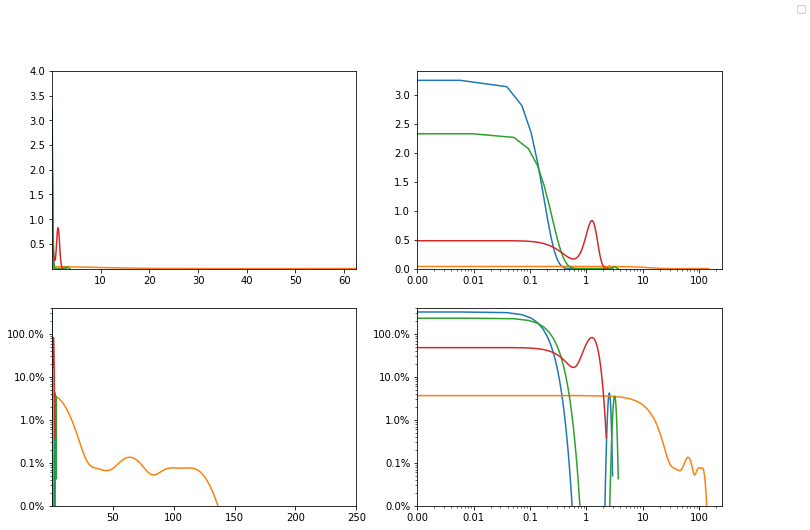

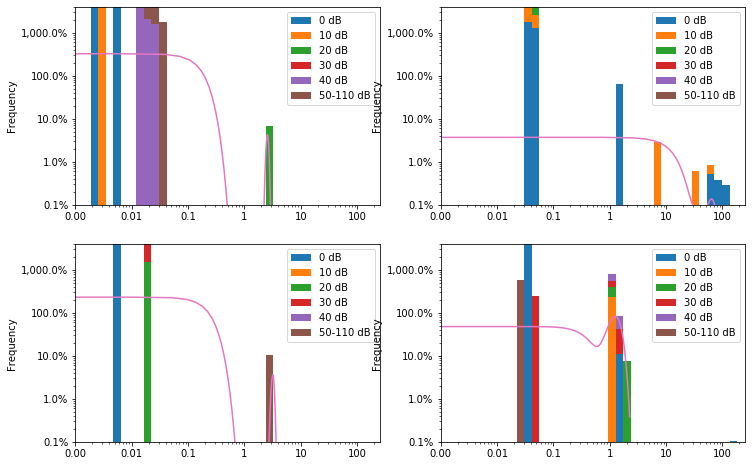

In [12]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'energy'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.001
y = 250

percx = 0.0001
percy = 4

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('drx_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=40)

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/


LinAlgError: singular matrix

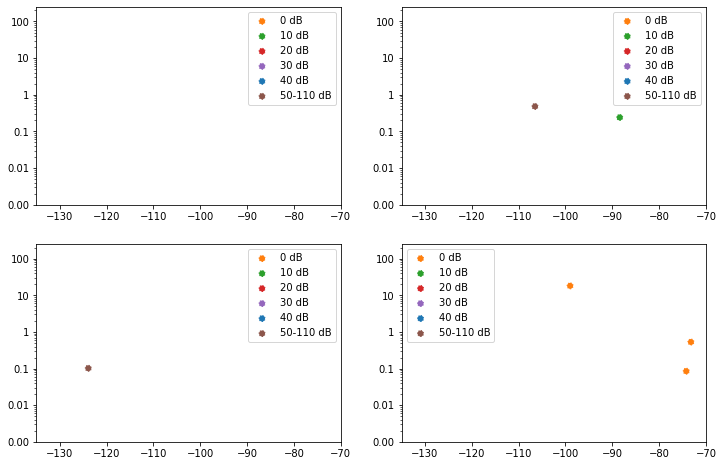

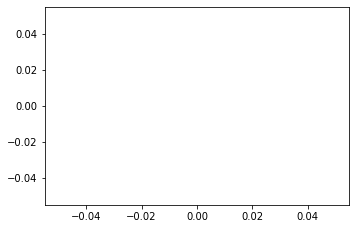

In [15]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'txBytes'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.001
y = 250

percx = 0.0001
percy = 4

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('drx_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=40)

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/


LinAlgError: singular matrix

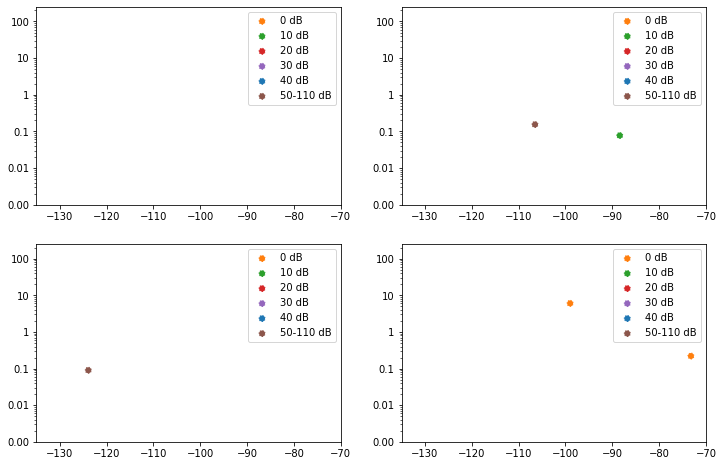

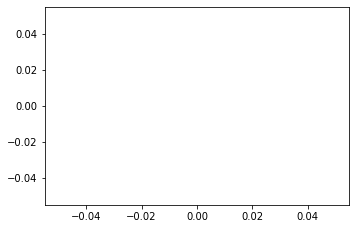

In [14]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'rxBytes'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.001
y = 250

percx = 0.0001
percy = 4

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('drx_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=40)